<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Decision_Tree(2022_09).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
pip install -U tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.0 MB 3.0 MB/s 
     |████████████████████████████████| 578.0 MB 8.7 kB/s 
     |████████████████████████████████| 5.9 MB 8.4 MB/s 
     |████████████████████████████████| 1.7 MB 16.9 MB/s 
     |████████████████████████████████| 438 kB 50.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [5]:
import pandas as pd
df = pd.read_csv('landslide.csv')
dfdata = df.values

In [6]:
df.dtypes

occ.                             int64
intensity                      float64
rock type                        int64
soil depth                     float64
friction angle                 float64
viscosity                      float64
moisture content               float64
weight                         float64
porosity                       float64
void ratio                     float64
saturation degree              float64
dryness                        float64
moistness                      float64
saturation                     float64
permeability coefficient       float64
USCS                             int64
slope                          float64
altitude                         int64
saturation moisture content    float64
dtype: object

In [7]:
x = dfdata[:,1:] 
y = dfdata[:,:1]

1. 엔트로피(Entropy)

-섞여있는 정도(반응변수의 값이 섞여있을수록 엔트로피가 높음)
-직관적 정의: 0or1일 확률이 최소(엔트로피=0), 0.5일 확률(p=0.5)이 최대가 되게 하는 함수
-수식: 
-clasification tree: 엔트로피가 높은 상황에서 낮은 상황으로 변화를 시킴
 

2. Information gain
-information gain = Entropy_before - Entropy_after
   => 엔트로피가 얼마나 낮아졌는지(차이)
-어떤 변수를 활용했고 그를 통해 얼마나 이득을 취했는지
-information gain을 통해 각각의 변수를 평가(중요도, 어떤 변수를 root node로?)
-node를 통해 분리된 가지에서 information gain 요약: 일반적으로 가중평균(각각 관측치 개수로 weight)을 주어 사용



2. 의사결정나무(Decision Tree)

1. 용어

-node: 분류의 기준이 되는 변수, node를 기준으로 sample을 나눔

-parent node: 상대적인 상위 노드

-child node: 상대적인 하위 노드

-root node: 상위 노드가 없는 가장 위의 노드

-leaf node(tip): 하위 노드가 없는 가장 아래의 노드

-internal node: leaf node가 아닌 노드

-edge: 가지, 샘플을 분류하는 조건

-depth: root node에서 특정 노드까지 도달하기 위해 거쳐야 하는 edge의 수

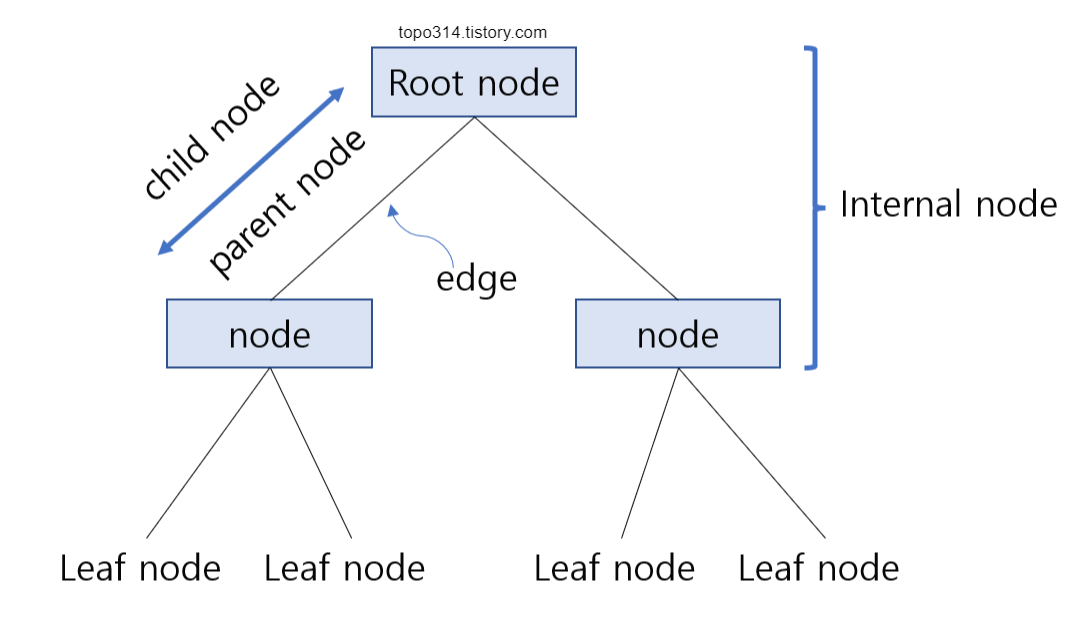



2. 정의
   1) Classification tree(분류 트리) 정의
     -종속변수(Y)가 범주형 변수일 때
     -tree의 조선에 따라 X가 가질 수 있는 영역을 block으로 나눔(block 한 칸=R_m)
     -R_m 결정
     -독립변수(X)가 범주형이면 각 범주에 따라, 연속형이면 임의로 나눈 여러 개의 영역에 따라
     -information gain이 최대가 되는 영역(region)을 찾기
     -엔트로피, 오분류율, 지니 인덱스(Gini index)를 가장 좋은 값으로 만드는 변수와 기준 선택
     -오분류율 식:

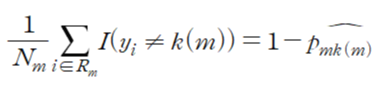
  
  

 


 -결정된 R_m에 대해
     -각각의 확률 p_mk(m번째 노드가 k범주일 확률(상대비율))가 가장 커지는 k를 Y의 추정값으로 한다.
     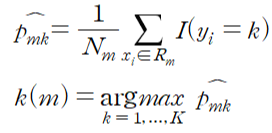




3. 특징

-장점: 해석력이 좋음, 직관적, 범용성(X, Y: 범주형, 연속형 다 사용 가능)
-단점: 변동성이 높음, sample 변화에 민감(sample이 조금만 바뀌어도 tree 구조가 바뀜) => Random forest 모델로 단점 완화

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [9]:
clf = DecisionTreeClassifier(random_state=1234)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.9

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df.columns
target_name = df.columns[0]
feature_cols = df.columns[1:]

In [14]:
!pip install graphviz
!pip install pydotplus
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


test set accuracy(R^2 determination): -0.24999999999999978


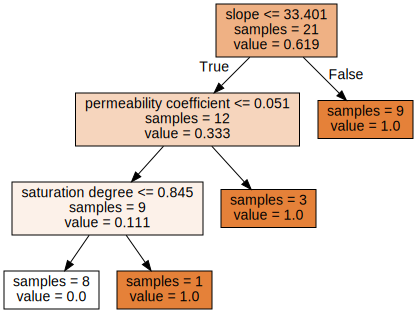

In [15]:
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

tree = DecisionTreeRegressor(random_state=123)
tree.fit(x_train, y_train)
print("test set accuracy(R^2 determination): {}".format(tree.score(x_test, y_test)))
# DecisionTree에서 score는 결정계수임

export_graphviz(tree, out_file='tree.dot',feature_names=feature_cols, impurity=False, filled=True)
with open("tree.dot") as f:
    tree_graph = f.read()
display(graphviz.Source(tree_graph))

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
model = clf.fit(x, y)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_15 <= 33.40
|   |--- feature_2 <= 0.95
|   |   |--- class: 0.0
|   |--- feature_2 >  0.95
|   |   |--- feature_15 <= 18.01
|   |   |   |--- class: 0.0
|   |   |--- feature_15 >  18.01
|   |   |   |--- class: 1.0
|--- feature_15 >  33.40
|   |--- class: 1.0



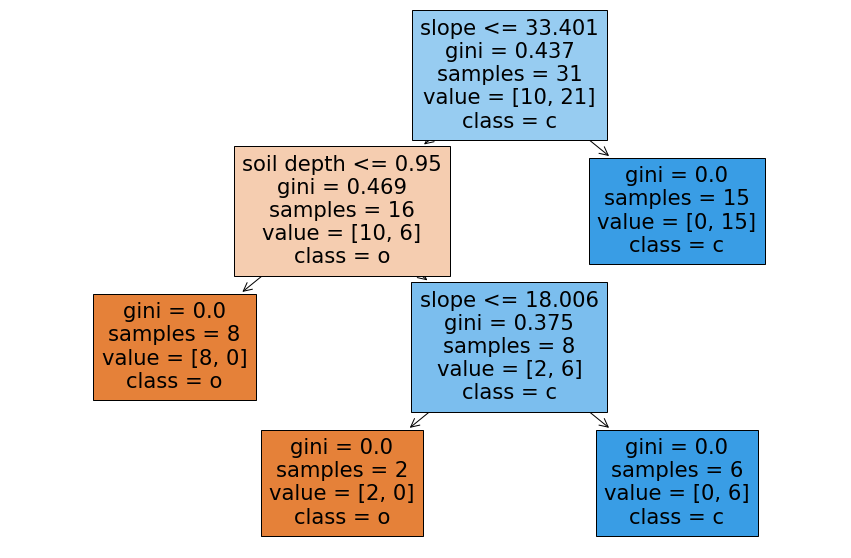

In [17]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=target_name,
                   filled=True)

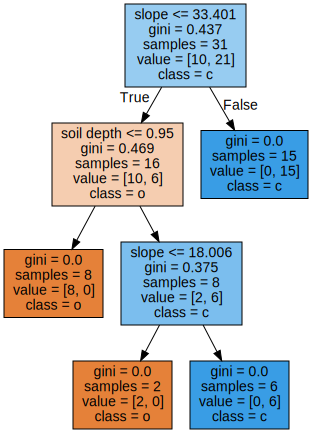

In [18]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,  
                                class_names=target_name,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [19]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

In [20]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 784 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=fea443324b3bb95568a2d734338cb9bbfa8ebde42bebe7f1d659a3f4d9b1420c
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


From above methods is visualizing with dtreeviz package.

it shows the distribution of decision feature in the each node (nice!)

it shows the class-color matching legend

it shows the distribution of the class in the leaf in case of classification tasks, and mean of the leaf’s reponse in the case of regression tasks

In [21]:
from dtreeviz.trees import dtreeviz

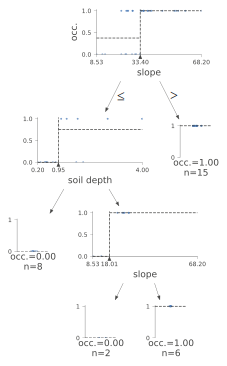

In [43]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(x, y)

viz = dtreeviz(regr, x, y,
                target_name=target_name,
                feature_names=feature_cols)
viz